<a href="https://colab.research.google.com/github/Megha0222/sum/blob/main/week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import metrics

In [173]:
df=pd.read_csv("/content/erpfcst_1993-2015.wk1.csv")

In [174]:
df.head()
a=range(1,333)
b=range(1,773)

In [175]:
df.drop(['date'],axis=1)

,observed,forecast
0,0.8020,2.880659e+00
1,1.6121,1.032361e+00
2,0.3287,5.469270e-04
3,0.0845,6.048928e-02
4,0.0000,0.000000e+00
...,...,...
1099,0.0000,1.862655e+00
1100,0.0000,1.580000e-07
1101,0.0000,8.464522e-03
1102,0.0000,0.000000e+00


In [176]:
X=np.asanyarray(df[['observed']]).astype('int')
y=np.asanyarray(df['forecast']).astype('int')
print(X.shape)
print(y.shape)

(1104, 1)
(1104,)


In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [178]:
len(X_train)


772

LINEAR REGRESSION

In [179]:
#LINEAR REGRESSION
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [180]:
LR.score(X, y)   #COEFFICIENT
LR.coef_

array([0.68754688])

In [181]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [182]:
LR_predict = LR.predict(X_test) #Predictions on Testing data
print(LR_predict)

[ 0.64208767  0.64208767  0.64208767  0.64208767  4.07982206  4.07982206
  0.64208767  0.64208767  7.51755644  0.64208767  0.64208767  0.64208767
  0.64208767  0.64208767  1.32963455  0.64208767  0.64208767  5.45491581
  0.64208767  0.64208767  2.70472831  0.64208767 17.14321272  0.64208767
  0.64208767  0.64208767  0.64208767  0.64208767  0.64208767  1.32963455
  1.32963455  3.39227518  0.64208767  5.45491581  0.64208767  0.64208767
  0.64208767  0.64208767  4.76736894 11.64283771  0.64208767  0.64208767
  5.45491581  2.01718143  0.64208767  6.83000957  1.32963455  0.64208767
  0.64208767  0.64208767  0.64208767  0.64208767  0.64208767  1.32963455
  0.64208767  9.58019708 10.26774395  0.64208767  0.64208767  3.39227518
  1.32963455  0.64208767  0.64208767  0.64208767  3.39227518  2.01718143
  0.64208767  0.64208767  3.39227518  0.64208767  0.64208767  0.64208767
  8.8926502   0.64208767  0.64208767  0.64208767  5.45491581  0.64208767
  0.64208767  0.64208767  0.64208767  0.64208767  3

In [183]:
# np.savetxt('/content/sample_data.csv',X_test ,delimiter=',')

In [184]:
# model accuracy (ncmrwf forecast vs Bias Corrected (LM) forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 1.7291402759210301
MSE: 11.099340746699669
RMSE: 3.331567310846303

-------Train Data--------
MAE: 1.6466904203382362
MSE: 11.249938148152063
RMSE: 3.3540927459079097

-----Training Accuracy-------
37.8
-----Testing Accuracy--------
37.3


In [185]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.5240963855421688
MSE: 12.608433734939759
RMSE: 3.5508356389644056
-------observation vs model forecast --------
MAE: 0.8078961819310072
MSE: 1.4130945068974823
RMSE: 1.18873651702027


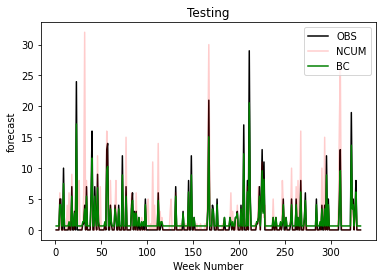

In [186]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "BC")
plt.xlabel('Week Number')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('LM.png')


plt.show()

Text(0.5, 1.0, 'Testing')

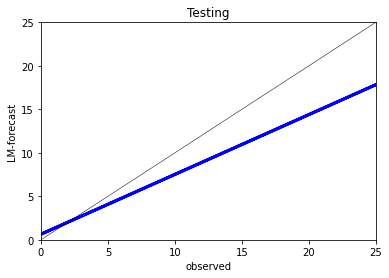

In [187]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('LM-forecast')
plt.title('Testing')


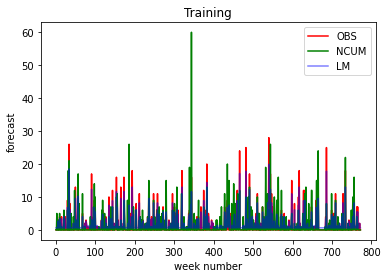

In [188]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()


Text(0.5, 1.0, 'Training')

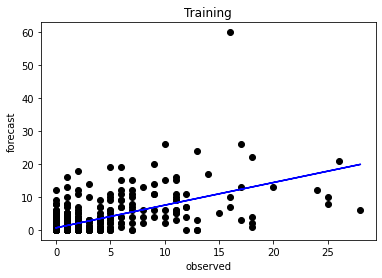

In [189]:

#plot outputs of training data
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Testing')

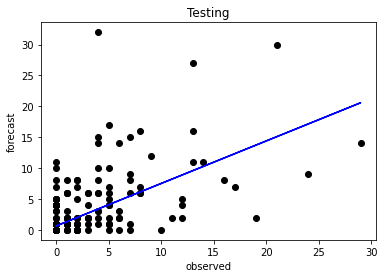

In [190]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')

SUPPORT VECTOR MACHINE CODE


In [191]:
#SUPPORT VECTOR CLASSIFIER
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [192]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [193]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.5240963855421688
MSE: 12.608433734939759
RMSE: 3.5508356389644056
-------observation vs model forecast --------
MAE: 1.2018072289156627
MSE: 9.623493975903614
RMSE: 3.1021756842422086


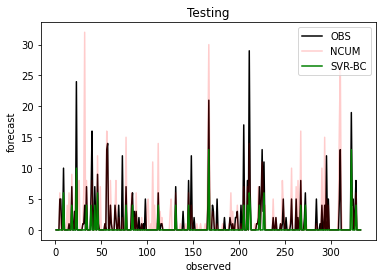

In [194]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "SVR-BC")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('SVR.png')

plt.show()

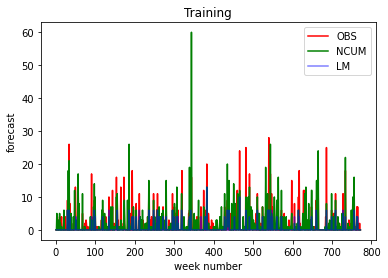

In [195]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()


Text(0.5, 1.0, 'Testing')

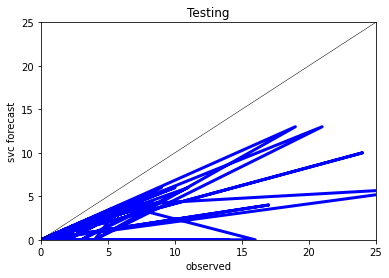

In [196]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('svc forecast')
plt.title('Testing')

Text(0.5, 1.0, 'Training')

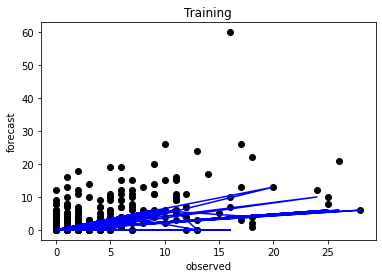

In [197]:
#plot outputs of training data
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')



Text(0.5, 1.0, 'Testing')

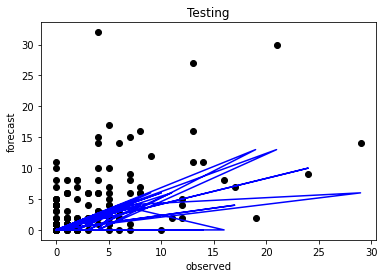

In [198]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')

RANDOM FOREST CLASSIFIER

In [199]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [200]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [201]:
random_forest_model_predict = random_forest_model.predict(X_test) #Predictions on Testing data
print(random_forest_model_predict)

[ 0.36300392  0.36300392  0.36300392  0.36300392  5.06914013  5.06914013
  0.36300392  0.36300392 10.21090142  0.36300392  0.36300392  0.36300392
  0.36300392  0.36300392  2.26461351  0.36300392  0.36300392  6.68936967
  0.36300392  0.36300392  2.22208689  0.36300392 11.20209731  0.36300392
  0.36300392  0.36300392  0.36300392  0.36300392  0.36300392  2.26461351
  2.26461351  2.79439556  0.36300392  6.68936967  0.36300392  0.36300392
  0.36300392  0.36300392  7.8933636  16.67739745  0.36300392  0.36300392
  6.68936967  2.83504493  0.36300392 10.74303209  2.26461351  0.36300392
  0.36300392  0.36300392  0.36300392  0.36300392  0.36300392  2.26461351
  0.36300392  8.03995345 12.02826105  0.36300392  0.36300392  2.79439556
  2.26461351  0.36300392  0.36300392  0.36300392  2.79439556  2.83504493
  0.36300392  0.36300392  2.79439556  0.36300392  0.36300392  0.36300392
  6.14581752  0.36300392  0.36300392  0.36300392  6.68936967  0.36300392
  0.36300392  0.36300392  0.36300392  0.36300392  2

In [202]:
# model accuracy (ncmrwf forecast vs Bias Corrected (RF) forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 1.6371062259239901
MSE: 11.780379452052967
RMSE: 3.432255738148451

-------Train Data--------
MAE: 1.4893467445735569
MSE: 9.724336890216678
RMSE: 3.118386905150911

-----Training Accuracy-------
37.8
-----Testing Accuracy--------
37.3


In [203]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))

-------observation vs ncmrwf forecast--------
MAE: 1.5240963855421688
MSE: 12.608433734939759
RMSE: 3.5508356389644056
-------observation vs model forecast --------
MAE: 0.7369349161799351
MSE: 2.838417840752713
RMSE: 1.684760469845109


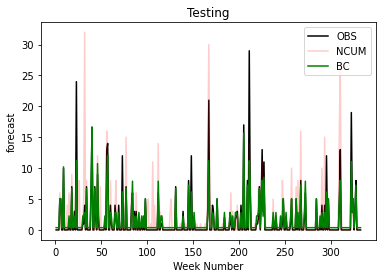

In [206]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "BC")
plt.xlabel('Week Number')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('RF.png')
plt.show()

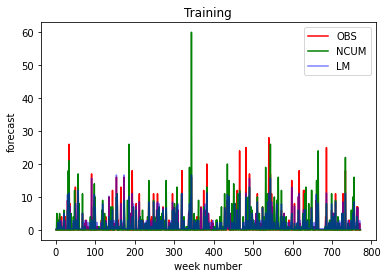

In [207]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()

Text(0.5, 1.0, 'Testing')

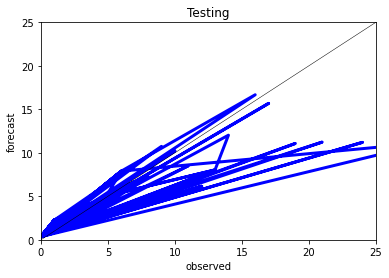

In [208]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')


Text(0.5, 1.0, 'Training')

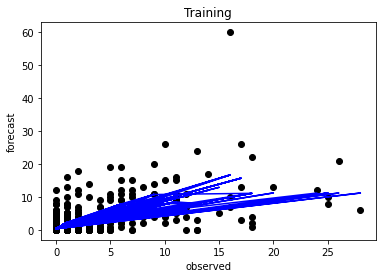

In [209]:
#plot outputs of training data

plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Training')

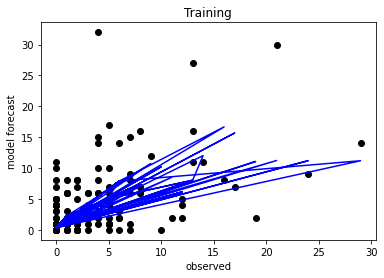

In [210]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('model forecast')
plt.title('Training')